# 📘 Naive Bayes（朴素贝叶斯分类器）

---

## 🔍 0. 背景介绍

朴素贝叶斯是一类基于 **贝叶斯定理** 和 **特征条件独立假设** 的监督学习方法，常用于分类任务。它是典型的**生成式模型**，即模型先学习每个类别下特征的分布，再据此预测所属类别。

尽管假设简单，但 Naive Bayes 在很多实际问题中都有很强表现，特别是：

- 📬 文本分类（垃圾邮件、情感分析）
- 🗂 文档分类（新闻主题、产品评论）
- 📈 小样本学习（特征稀疏、样本有限时尤为有效）

---

## 🧠 1. 基本思想与公式推导

我们想要计算：

$$
P(y \mid x_1, x_2, \dots, x_n)
$$

利用贝叶斯定理（Bayes Theorem）：

$$
P(y \mid \mathbf{x}) = \frac{P(\mathbf{x} \mid y) P(y)}{P(\mathbf{x})}
$$

因为对于所有类别 $y$ 来说，分母 $P(\mathbf{x})$ 相同，所以我们只需比较：

$$
\hat{y} = \arg\max_y P(y) P(\mathbf{x} \mid y)
$$

但 $P(\mathbf{x} \mid y) $很难估计（维度太高），所以引入朴素假设：

> **假设特征之间在给定 \( y \) 的条件下彼此独立**：

$$
P(\mathbf{x} \mid y) = \prod_{i=1}^n P(x_i \mid y)
$$

最终分类器形式为：

$$
\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)
$$

---

## 🎯 2. 为何叫“朴素”？

Naive Bayes 的 “Naive” 是因为它**天真地认为特征之间是条件独立的**。这种假设在现实中通常不成立，但 surprisingly，它在很多任务中表现非常好。

---

## 📦 3. 类别与适用场景

| 类型             | 特征分布假设           | 应用场景                         |
|------------------|------------------------|----------------------------------|
| **GaussianNB**   | 连续特征服从正态分布     | 数值型数据，如体温、年龄等        |
| **MultinomialNB**| 特征是整数（词频）      | 文本分类、新闻分类、情感分析等     |
| **BernoulliNB**  | 特征是布尔值（0/1）     | 是否出现某词、是否含特征等任务     |

---

## 🛠 4. 模型训练过程（直觉解释）

1. **先验概率 $P(y)$**：
   - 不同类别在训练集中的出现频率

2. **类条件概率 $P(x_i \mid y)$**：
   - 统计每个特征在每个类别下的分布（频率、均值方差等）

3. **分类时**：
   - 对每个可能的 $ y$，计算 $P(y) \prod P(x_i \mid y)$
   - 选择概率最大的作为预测结果

---

## 📈 5. 优缺点总结

| 优点                                       | 缺点                                |
|--------------------------------------------|-------------------------------------|
| ✅ 简单高效，适合大规模特征                  | ❌ 特征之间若高度相关会破坏独立性假设 |
| ✅ 在样本少、高维、稀疏数据上表现稳定         | ❌ 对连续变量建模能力弱（高斯分布可能不准确） |
| ✅ 训练和预测非常快                         | ❌ 不擅长表达复杂非线性关系         |
| ✅ 能增量学习，可更新模型                   | ❌ 概率不是很“可信”，仅用于比较大小 |

---

## 📚 6. 常见应用场景

- ✉️ 垃圾邮件识别
- 💬 评论情感分类（positive / negative）
- 📰 新闻主题分类
- 🔍 医疗诊断、信用风险评分

---

## 🧠 7. 面试常问问题

### Q1: 贝叶斯定理是什么？
$$
P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}
$$

### Q2: 什么是假设条件独立？为什么要用它？
假设在已知类别 $(y)$ 情况下，所有特征 $( x_i )$ 之间相互独立。
这样就能将高维联合概率 $P(x_1, \dots, x_n \mid y)$ 拆成单维乘积，极大简化建模。

### Q3: Naive Bayes 和 Logistic Regression 有什么区别？

| 项目               | Naive Bayes                  | Logistic Regression             |
|--------------------|------------------------------|----------------------------------|
| 模型类型           | 生成模型（建模 $P(x, y) $） | 判别模型（建模 $P(y \mid x)$） |
| 假设               | 特征条件独立                  | 不作独立性假设                   |
| 是否输出概率       | 有，但不是 calibrated         | 概率输出具有对数几率解释         |
| 适合场景           | 特征多样/高维稀疏/文本        | 特征数量合理，线性边界问题       |


In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from data_pipeline import load_bank_data, build_pipeline, evaluate_model

 Classification Report (Naive Bayes (Gaussian)):
               precision    recall  f1-score   support

           0       0.92      0.87      0.90       801
           1       0.31      0.45      0.37       104

    accuracy                           0.82       905
   macro avg       0.62      0.66      0.63       905
weighted avg       0.85      0.82      0.84       905

 Confusion Matrix:
 [[696 105]
 [ 57  47]]
 Accuracy: 0.8210


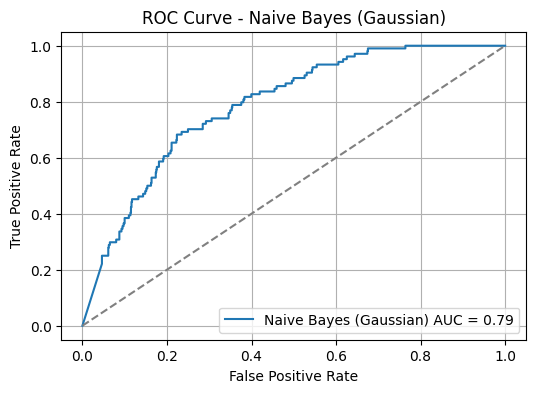

In [4]:
# 1. 加载数据
X, y, categorical_cols, numerical_cols = load_bank_data("bank.csv")

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. 初始化高斯朴素贝叶斯模型
nb_model = GaussianNB()

# 4. 构建 Pipeline（自动包含预处理）
pipeline = build_pipeline(numerical_cols, categorical_cols, nb_model)

# 5. 模型训练
pipeline.fit(X_train, y_train)

# 6. 模型评估（包含报告、混淆矩阵、ROC 曲线）
evaluate_model(pipeline, X_test, y_test, model_name="Naive Bayes (Gaussian)")
